In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('loan-recovery.csv')

In [27]:
df.info()  #Gives basic information about dataset
df.head(5)  #Gives first 5 rows 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Borrower_ID              500 non-null    object 
 1   Age                      500 non-null    int64  
 2   Gender                   500 non-null    object 
 3   Employment_Type          500 non-null    object 
 4   Monthly_Income           500 non-null    int64  
 5   Num_Dependents           500 non-null    int64  
 6   Loan_ID                  500 non-null    object 
 7   Loan_Amount              500 non-null    int64  
 8   Loan_Tenure              500 non-null    int64  
 9   Interest_Rate            500 non-null    float64
 10  Loan_Type                500 non-null    object 
 11  Collateral_Value         500 non-null    float64
 12  Outstanding_Loan_Amount  500 non-null    float64
 13  Monthly_EMI              500 non-null    float64
 14  Payment_History          5

,Borrower_ID,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_ID,Loan_Amount,Loan_Tenure,Interest_Rate,...,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken
0,BRW_1,59,Male,Salaried,215422,0,LN_1,1445796,60,12.39,...,1727997.258,2.914130e+05,4856.88,On-Time,0,0,Partially Recovered,1,Settlement Offer,No
1,BRW_2,49,Female,Salaried,60893,0,LN_2,1044620,12,13.47,...,1180032.362,6.652042e+05,55433.68,On-Time,0,0,Fully Recovered,2,Settlement Offer,No
2,BRW_3,35,Male,Salaried,116520,1,LN_3,1923410,72,7.74,...,2622539.931,1.031372e+06,14324.61,Delayed,2,124,Fully Recovered,2,Legal Notice,No
3,BRW_4,63,Female,Salaried,140818,2,LN_4,1811663,36,12.23,...,1145492.680,2.249739e+05,6249.28,On-Time,1,56,Fully Recovered,2,Calls,No
4,BRW_5,28,Male,Salaried,76272,1,LN_5,88578,48,16.13,...,0.000,3.918989e+04,816.46,On-Time,1,69,Fully Recovered,0,Debt Collectors,No


In [28]:
df.duplicated().sum()

np.int64(0)

In [29]:
df.isnull().sum()

Borrower_ID                0
Age                        0
Gender                     0
Employment_Type            0
Monthly_Income             0
Num_Dependents             0
Loan_ID                    0
Loan_Amount                0
Loan_Tenure                0
Interest_Rate              0
Loan_Type                  0
Collateral_Value           0
Outstanding_Loan_Amount    0
Monthly_EMI                0
Payment_History            0
Num_Missed_Payments        0
Days_Past_Due              0
Recovery_Status            0
Collection_Attempts        0
Collection_Method          0
Legal_Action_Taken         0
dtype: int64

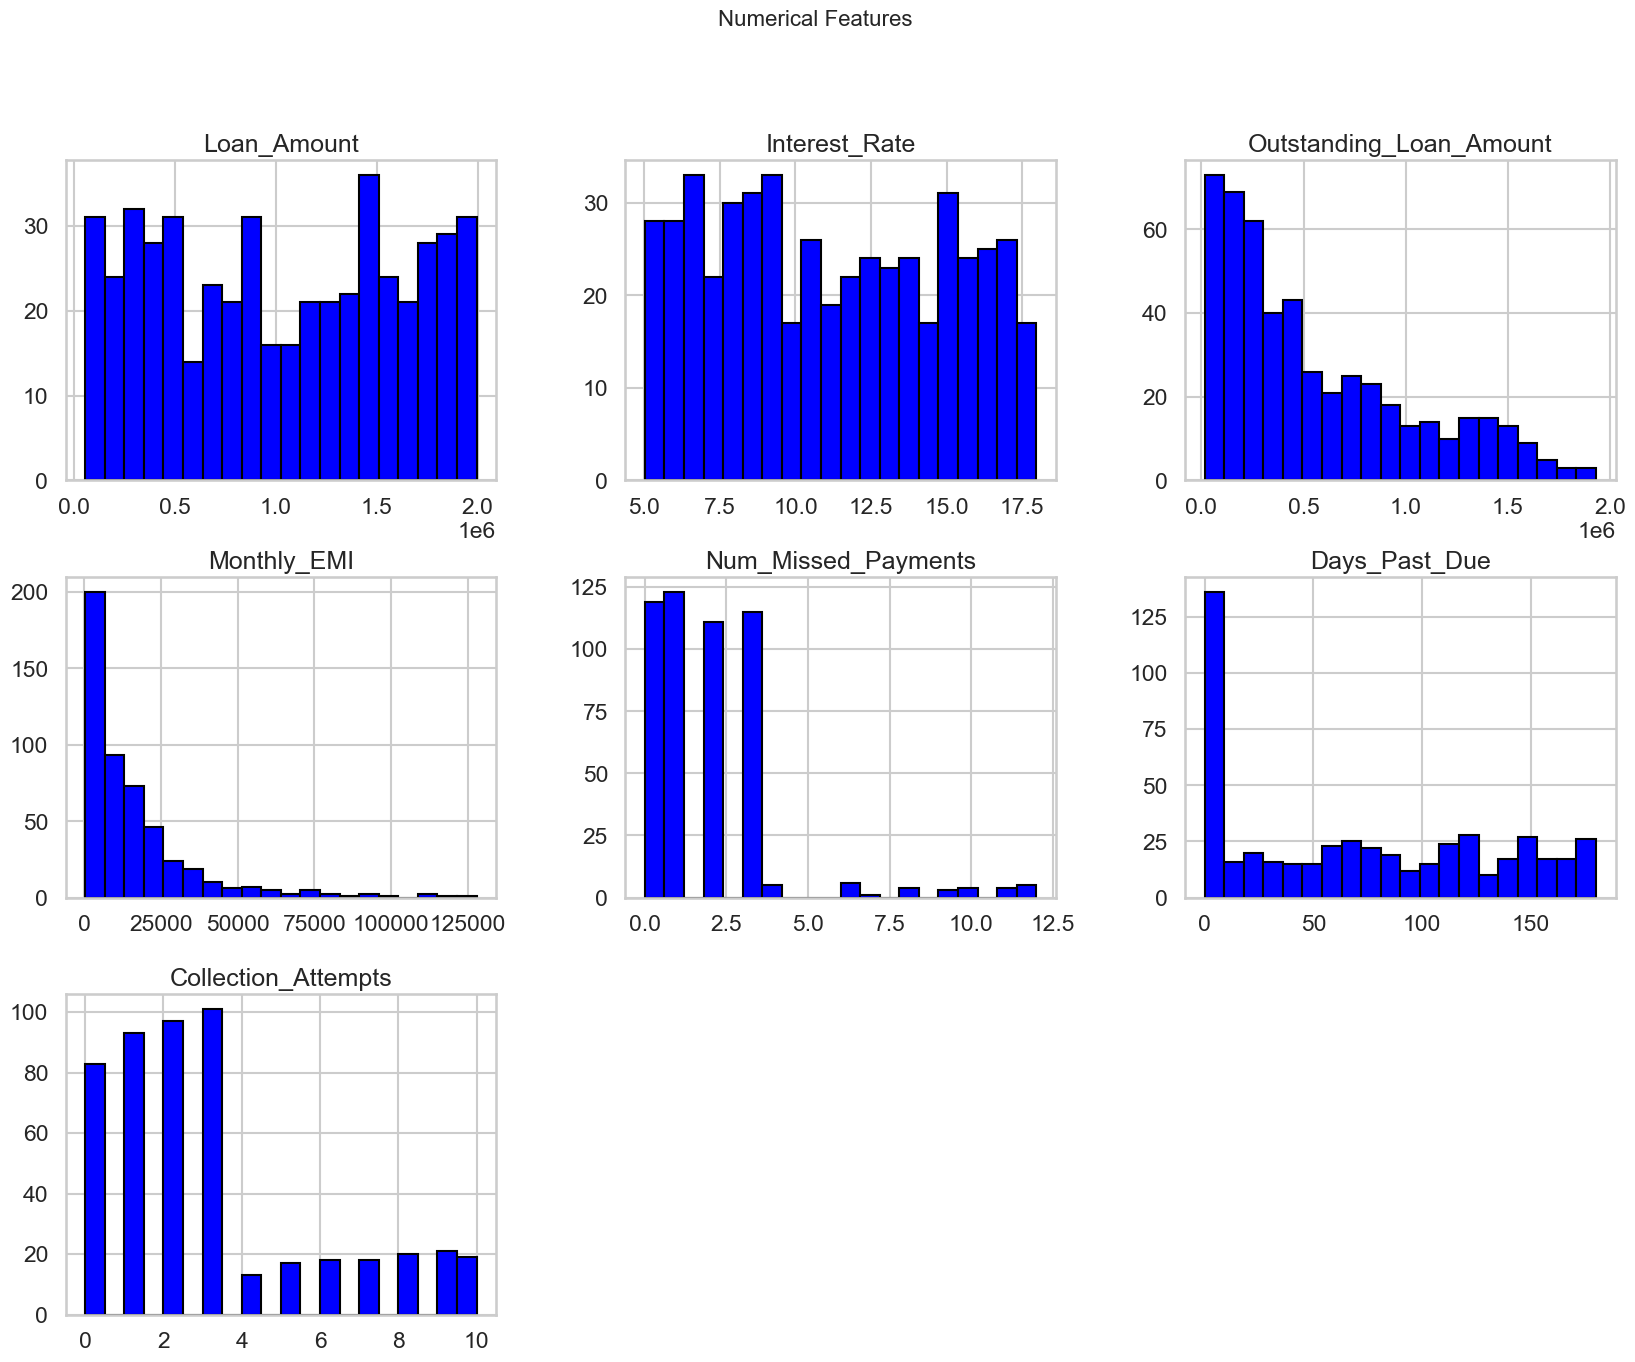

In [104]:
num_cols = ['Loan_Amount','Interest_Rate','Outstanding_Loan_Amount','Monthly_EMI','Num_Missed_Payments','Days_Past_Due','Collection_Attempts']
df[num_cols].hist(figsize=(20,15),bins=20,color='blue',edgecolor='black')
plt.suptitle("Numerical Features",fontsize=16)
plt.show()

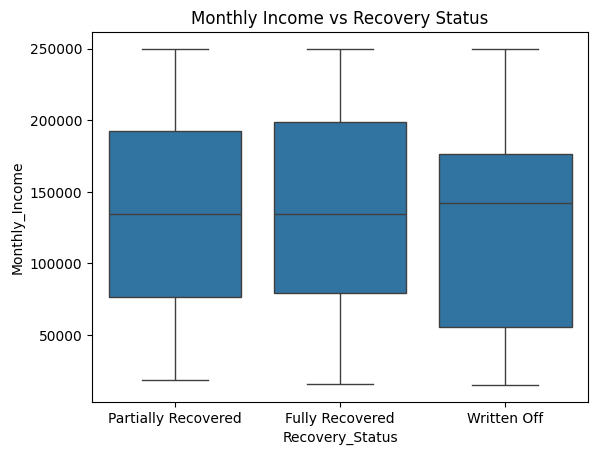

In [32]:
sns.boxplot(x='Recovery_Status',y='Monthly_Income',data=df)
plt.title("Monthly Income vs Recovery Status")
plt.show()

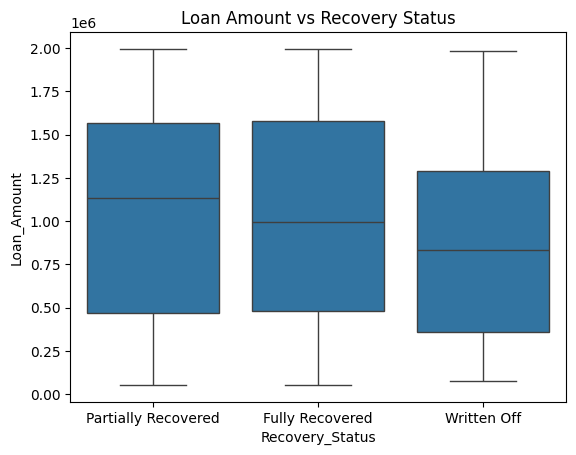

In [33]:
sns.boxplot(x='Recovery_Status',y='Loan_Amount',data=df)
plt.title("Loan Amount vs Recovery Status")
plt.show()

C:\Users\krish\AppData\Local\Temp\ipykernel_5308\362200783.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


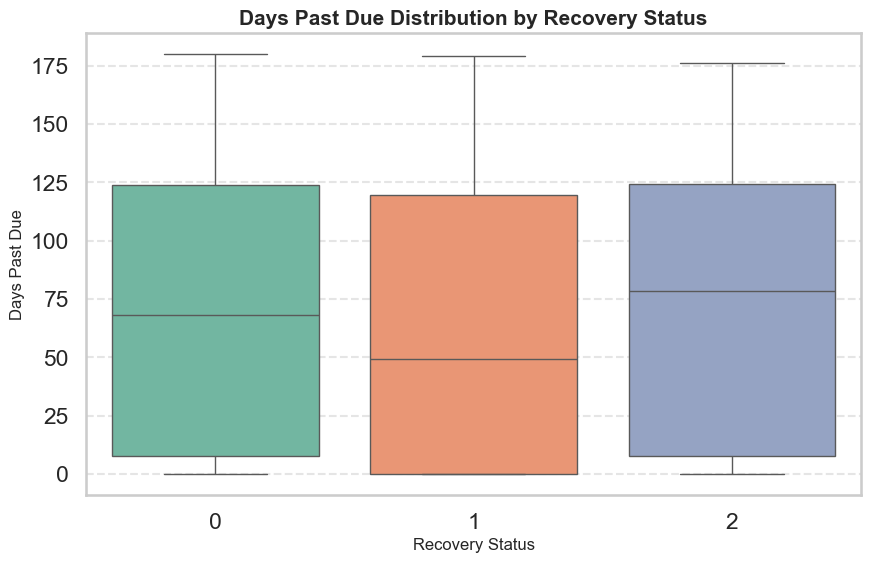

In [101]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x='Recovery_Status',
    y='Days_Past_Due',
    data=df,
    palette='Set2'
)
plt.title("Days Past Due Distribution by Recovery Status", fontsize=15, fontweight='bold')
plt.xlabel("Recovery Status", fontsize=12)
plt.ylabel("Days Past Due", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

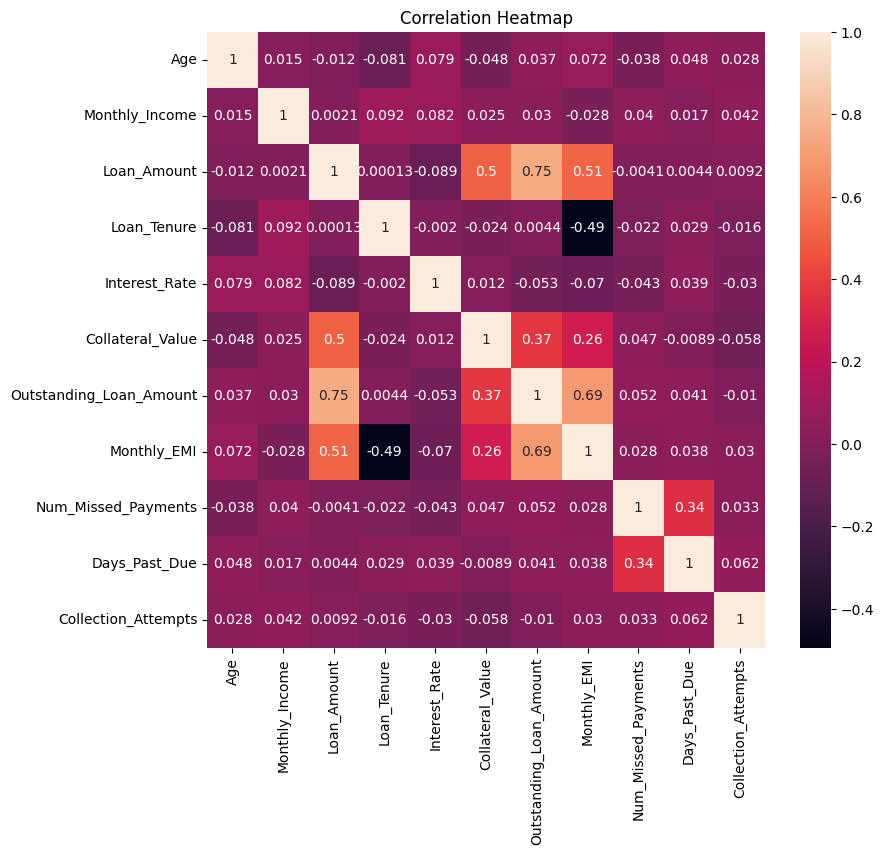

In [35]:
corr = df[num_cols].corr()
plt.figure(figsize=(9,8))
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()

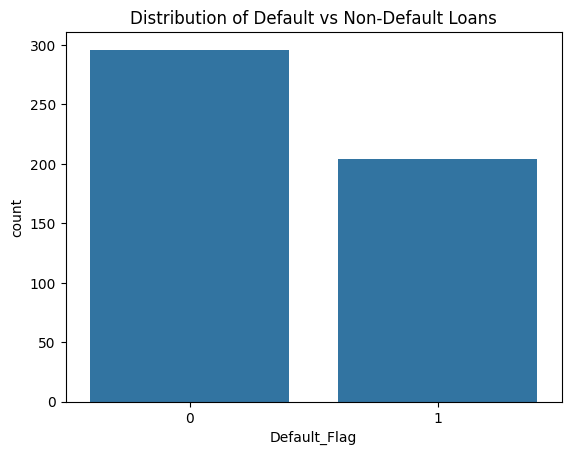

In [36]:
df['Default_Flag'] = df['Recovery_Status'].apply(lambda x: 0 if x == 'Fully Recovered' else 1)
sns.countplot(x='Default_Flag', data=df)
plt.title("Distribution of Default vs Non-Default Loans")
plt.show()

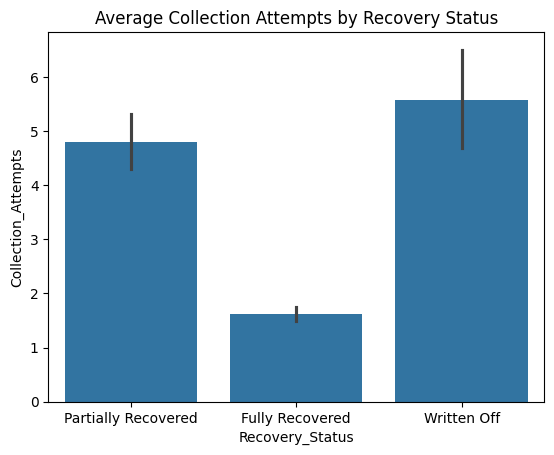

In [37]:
sns.barplot(x='Recovery_Status',y='Collection_Attempts',data=df,estimator='mean')
plt.title("Average Collection Attempts by Recovery Status")
plt.show()

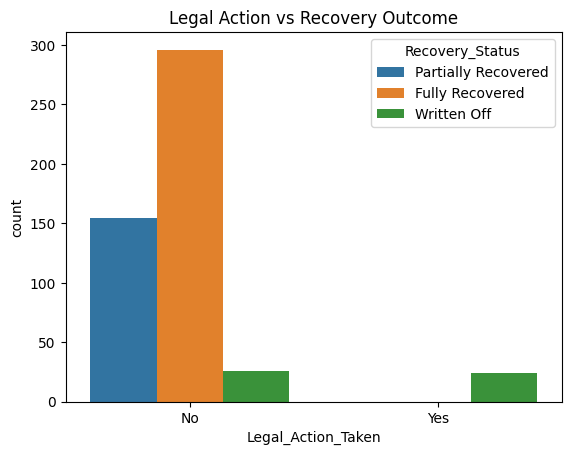

In [38]:
sns.countplot(x='Legal_Action_Taken',hue='Recovery_Status',data=df)
plt.title("Legal Action vs Recovery Outcome")
plt.show()

In [39]:
from sklearn.preprocessing import LabelEncoder
label_cols = ['Gender','Employment_Type','Loan_Type','Payment_History','Recovery_Status','Collection_Method','Legal_Action_Taken']
encoder = LabelEncoder()
for col in label_cols:
    df[col] = encoder.fit_transform(df[col])
df.dtypes

Borrower_ID                 object
Age                          int64
Gender                       int64
Employment_Type              int64
Monthly_Income               int64
Num_Dependents               int64
Loan_ID                     object
Loan_Amount                  int64
Loan_Tenure                  int64
Interest_Rate              float64
Loan_Type                    int64
Collateral_Value           float64
Outstanding_Loan_Amount    float64
Monthly_EMI                float64
Payment_History              int64
Num_Missed_Payments          int64
Days_Past_Due                int64
Recovery_Status              int64
Collection_Attempts          int64
Collection_Method            int64
Legal_Action_Taken           int64
Default_Flag                 int64
dtype: object

In [79]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
#features and target
X = df.drop(columns=['Borrower_ID','Loan_ID','Recovery_Status'])
y = df['Recovery_Status']
#Initialize model
rf = RandomForestClassifier(n_estimators=100,random_state=42)
#Define cross-validation
kf = KFold(n_splits=5,shuffle=True,random_state=42)
#cross-validation scores
scores = cross_val_score(rf,X,y,cv=kf,scoring='accuracy')
#Results
print("Cross-validation scores for each fold:", scores)
print("Mean Accuracy: {:.2f}%".format(scores.mean() * 100))
print("Standard Deviation: {:.2f}%".format(scores.std() * 100))

Cross-validation scores for each fold: [0.93 0.95 0.98 0.94 0.94]
Mean Accuracy: 94.80%
Standard Deviation: 1.72%


Model Accuracy: 96.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.89      1.00      0.94        31
           2       1.00      0.60      0.75        10

    accuracy                           0.96       100
   macro avg       0.96      0.87      0.90       100
weighted avg       0.96      0.96      0.96       100



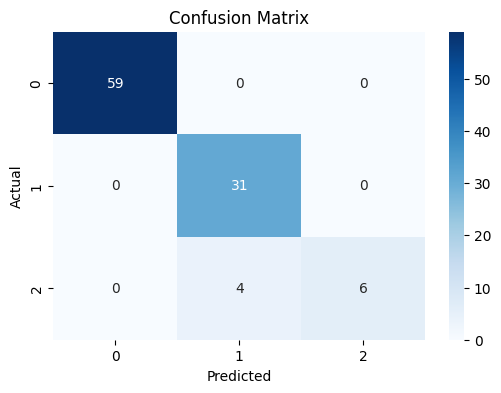

Overfitting Check:
Training Accuracy: 100.00%
Testing Accuracy:  96.00%

The model shows balanced performance on train and test data.


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
#Model Training
rf = RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
rf.fit(X_train, y_train)
#Predictions and Evaluation
y_pred = rf.predict(X_test)
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%\n")
# Classification
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Check for Overfitting
train_accuracy = rf.score(X_train, y_train)
test_accuracy = rf.score(X_test, y_test)
print("Overfitting Check:")
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy:  {test_accuracy * 100:.2f}%")
#interpretation
if train_accuracy - test_accuracy > 0.05:
    print("\n The model might be overfitting (large gap between train and test accuracy).")
elif test_accuracy > train_accuracy:
    print("\n No overfitting detected — model generalizes well.")
else:
    print("\nThe model shows balanced performance on train and test data.")

Multi-class AUC Score: 0.9645


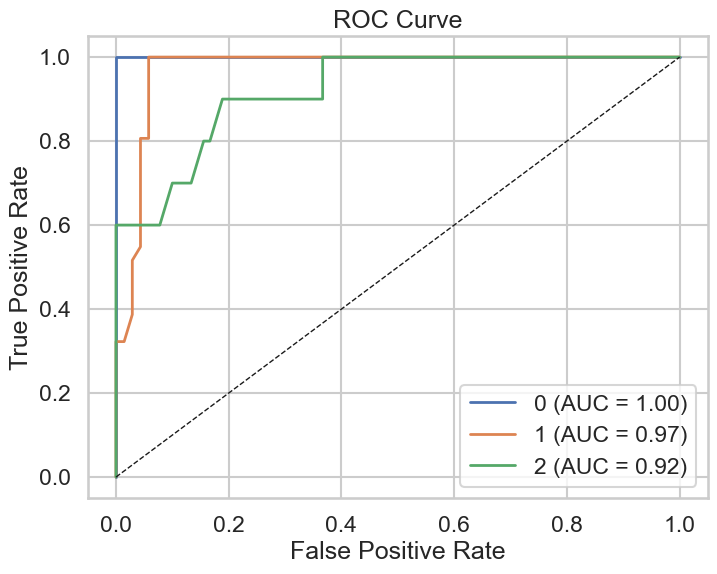

In [106]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
# Calculation of ROC Curve and AUC
classes = np.unique(y_test)
# For String labels or multi-class
if y_test.dtype == 'O' or len(classes) > 2:
    # Binarize the output for multi-class ROC
    y_test_bin = label_binarize(y_test, classes=classes)
    y_prob = np.array(rf.predict_proba(X_test))
    # Calculate AUC
    auc_score = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')
    print(f"Multi-class AUC Score: {auc_score:.4f}")
    # Plot ROC Curve for each class
    plt.figure(figsize=(8, 6))
    for i, class_label in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{class_label} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.show()

else:
    # Binary Classification
    y_prob = rf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    print(f"Binary AUC Score: {auc_score:.4f}")
    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.show()

In [82]:
import joblib
# Saving the model
joblib.dump(rf, "krish_loan_recovery_model.pkl")
print("Model saved successfully as 'krish_loan_recovery_model.pkl'")

Model saved successfully as 'krish_loan_recovery_model.pkl'


In [92]:
import joblib
import pandas as pd
def predict_recovery_status(user_input_dict):
    model = joblib.load("krish_loan_recovery_model.pkl")
    user_df = pd.DataFrame([user_input_dict])[model.feature_names_in_]
    pred = int(model.predict(user_df)[0])
    label_map = {0: "Fully Recovered", 1: "Partially Recovered", 2: "Written Off"}
    print(f"Predicted Recovery Status: {label_map.get(pred, pred)}")
#input
sample_user = {
    'Borrower_ID': 'B001',
    'Age': 35,
    'Gender': 1,
    'Employment_Type': 1,
    'Monthly_Income': 550000,
    'Num_Dependents': 2,
    'Loan_ID': 'L001',
    'Loan_Amount': 200000,
    'Loan_Tenure': 36,
    'Interest_Rate': 12.5,
    'Loan_Type': 1,
    'Collateral_Value': 150000,
    'Outstanding_Loan_Amount': 100000,
    'Monthly_EMI': 6200,
    'Payment_History': 1,
    'Num_Missed_Payments': 1,
    'Days_Past_Due': 15,
    'Collection_Attempts': 1,
    'Collection_Method': 1,
    'Legal_Action_Taken': 0,
    'Default_Flag': 0
}
predict_recovery_status(sample_user)

Predicted Recovery Status: Fully Recovered


In [ ]:
sample_user_partial = {
    'Borrower_ID': 'B002',
    'Age': 42,
    'Gender': 1,
    'Employment_Type': 0,
    'Monthly_Income': 30000,
    'Num_Dependents': 3,
    'Loan_ID': 'L002',
    'Loan_Amount': 250000,
    'Loan_Tenure': 48,
    'Interest_Rate': 13.0,
    'Loan_Type': 1,
    'Collateral_Value': 120000,
    'Outstanding_Loan_Amount': 120000,
    'Monthly_EMI': 7000,
    'Payment_History': 0,
    'Num_Missed_Payments': 2,
    'Days_Past_Due': 30,
    'Collection_Attempts': 2,
    'Collection_Method': 1,
    'Legal_Action_Taken': 0,
    'Default_Flag': 0
}

In [ ]:
sample_user_not = {
    'Borrower_ID': 'B003',
    'Age': 50,
    'Gender': 0,
    'Employment_Type': 0,
    'Monthly_Income': 18000,
    'Num_Dependents': 4,
    'Loan_ID': 'L003',
    'Loan_Amount': 300000,
    'Loan_Tenure': 60,
    'Interest_Rate': 15.5,
    'Loan_Type': 0,
    'Collateral_Value': 80000,
    'Outstanding_Loan_Amount': 250000,
    'Monthly_EMI': 8500,
    'Payment_History': 0,
    'Num_Missed_Payments': 6,
    'Days_Past_Due': 90,
    'Collection_Attempts': 4,
    'Collection_Method': 2,
    'Legal_Action_Taken': 1,
    'Default_Flag': 1
}